In [290]:
# import the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_palette("BrBG")

In [289]:
#read the data sets
data = pd.read_csv("athlete_events.csv")
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [145]:
regions = pd.read_csv("noc_regions.csv")
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [146]:
data_olympics = pd.merge(data, regions, on='NOC', how='left')

In [147]:
data_olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [148]:
data_olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [149]:
data_olympics.shape

(271116, 17)

In [150]:
data_olympics['region'].fillna(data_olympics.Team, inplace=True)


In [151]:
data_olympics.region.value_counts().head(10)

USA          18853
Germany      15883
France       12758
UK           12256
Russia       11692
Italy        10715
Canada        9734
Japan         8444
Sweden        8339
Australia     7724
Name: region, dtype: int64

In [45]:
#data_olympics.Age.fillna('Unknown', inplace=True)


In [152]:
data_olympics.Weight.fillna(data_olympics.Weight.mean(), inplace=True)

In [153]:
data_olympics.Height.fillna(data_olympics.Height.mean(), inplace=True)

In [154]:
data_olympics.shape

(271116, 17)

# Start the Analysis

In [68]:
data_olympics.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN


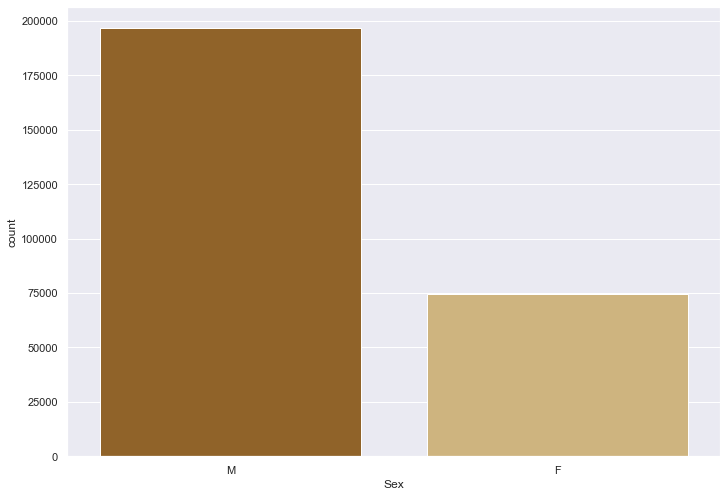

In [155]:
#genderwise atheletes in olympics
sns.countplot('Sex', data=data_olympics)
plt.show()

In [156]:
#different edition in olympics

data_olympics.Year.nunique()

35

In [157]:
#different seasons in olympics
data_olympics.Season.unique().tolist()


['Summer', 'Winter']

In [158]:
#different cities in olympics
data_olympics.City.unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary',
       'Albertville', 'Lillehammer', 'Los Angeles', 'Salt Lake City',
       'Helsinki', 'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm',
       'Sochi', 'Nagano', 'Torino', 'Beijing', 'Rio de Janeiro', 'Athina',
       'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich',
       'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo", 'Melbourne',
       'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver',
       'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz',
       'Garmisch-Partenkirchen'], dtype=object)

In [159]:
#different sports in olympics
data_olympics.Sport.unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [160]:
#different regions in olympics
data_olympics.region.nunique()

213

In [161]:
data_olympics.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


###### Gender wise Medal won in olympics

In [162]:
medal_gender = medal_data.groupby(['Sex','Medal'])['ID'].count().reset_index()
medal_gender

,Sex,Medal,ID
0,F,Bronze,3771
1,F,Gold,3747
2,F,Silver,3735
3,M,Bronze,9524
4,M,Gold,9625
5,M,Silver,9381


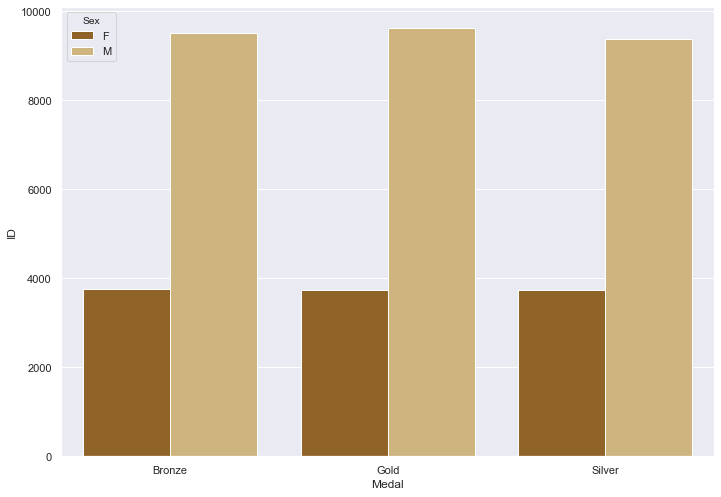

In [163]:
sns.barplot(x='Medal', y='ID', data=medal_gender, hue='Sex')
plt.show()

In [164]:
data_olympics.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


In [165]:
# Average age to win medal
medal_data=data_olympics[-data_olympics.Medal.isnull()]

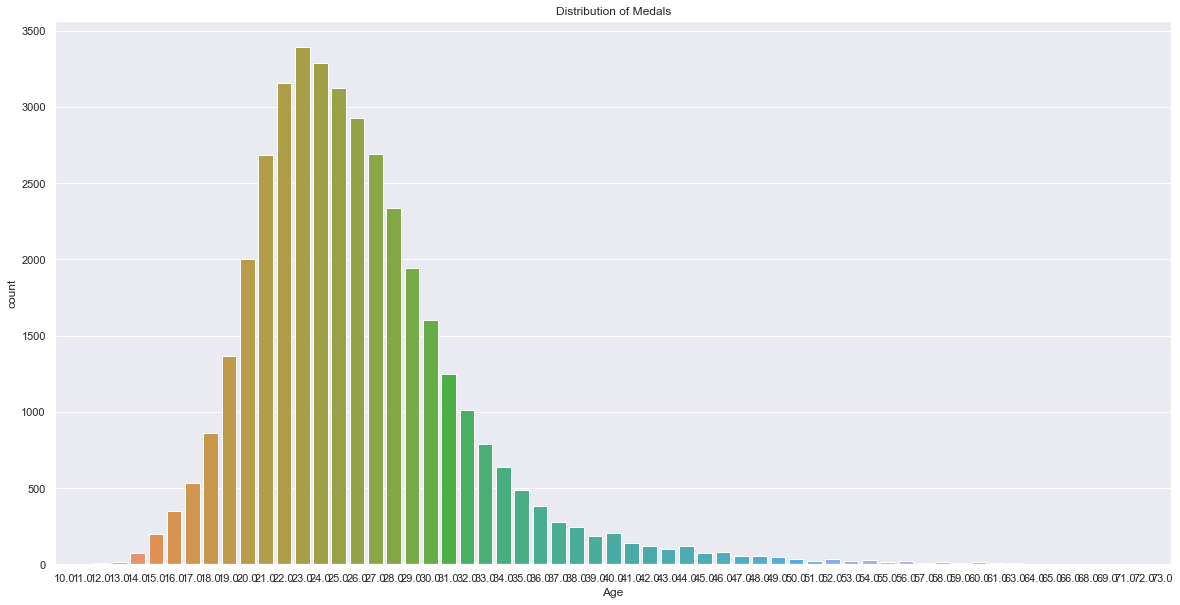

In [166]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(medal_data['Age'])
plt.title('Distribution of Medals')
plt.show()

In [171]:
medal_above_50=medal_data[medal_data.Age >50]
medal_above_50.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3680,2112,Abdullah Al-Rashidi,M,52.0,183.00000,83.000000,Individual Olympic Athletes,IOA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,Shooting Men's Skeet,Bronze,Individual Olympic Athletes,Individual Olympic Athletes
5077,2894,Derek Swithin Allhusen,M,54.0,180.00000,71.000000,Great Britain,GBR,1968 Summer,1968,Summer,Mexico City,Equestrianism,"Equestrianism Mixed Three-Day Event, Individual",Silver,UK,NaN
5078,2894,Derek Swithin Allhusen,M,54.0,180.00000,71.000000,Great Britain,GBR,1968 Summer,1968,Summer,Mexico City,Equestrianism,"Equestrianism Mixed Three-Day Event, Team",Gold,UK,NaN
7961,4404,Johan August Anker,M,56.0,175.33897,70.702393,Norna,NOR,1928 Summer,1928,Summer,Amsterdam,Sailing,Sailing Mixed 6 metres,Gold,Norway,NaN
13393,7272,"Nikolaus ""Klaus"" Balkenhol",M,52.0,178.00000,83.000000,Germany,GER,1992 Summer,1992,Summer,Barcelona,Equestrianism,"Equestrianism Mixed Dressage, Individual",Bronze,Germany,NaN


In [175]:
medal_50_sport=medal_above_50.groupby(['Medal','Sport'])['ID'].count().reset_index()


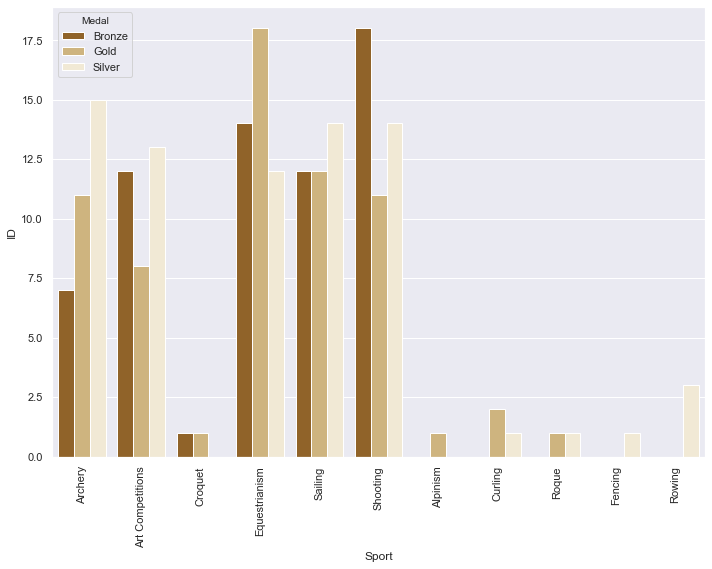

In [180]:
sns.barplot(x='Sport', y='ID', data=medal_50_sport, hue='Medal')
plt.xticks(rotation=90)
plt.show()

In [181]:
data_olympics.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


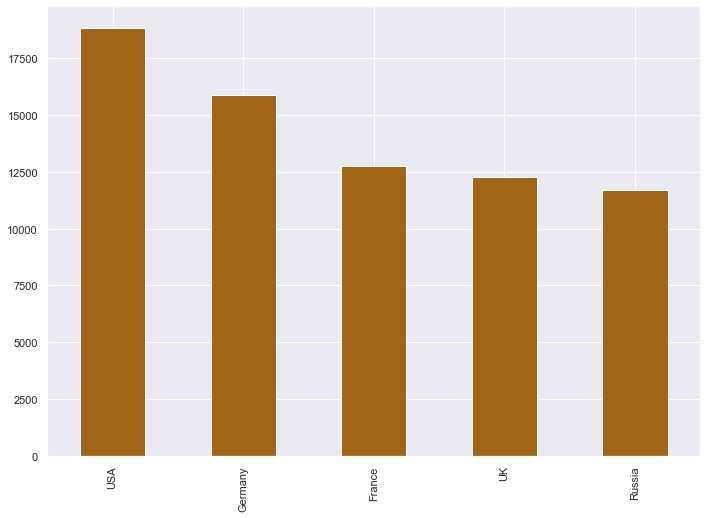

In [221]:
#top 5 medal country

data_olympics.region.value_counts().head(5).plot.bar()
plt.show()

In [214]:
#more than 50 medals win by regions
country_medal=data_olympics.groupby(['region','Medal'])['ID'].count().sort_values(ascending=False).reset_index()
country_medal_50=country_medal[country_medal['ID']>50]

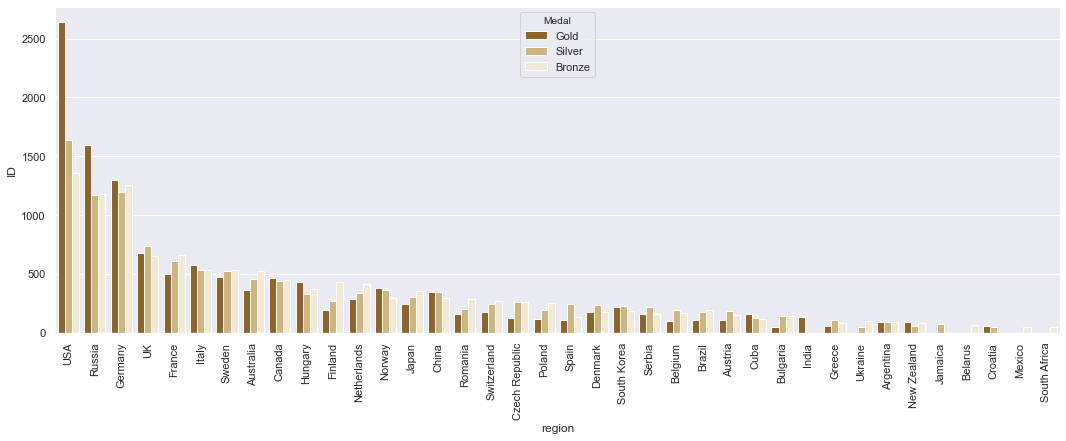

In [213]:
plt.figure(figsize=(18,6))
sns.barplot(x='region', y='ID', data=country_medal_50, hue='Medal')
plt.xticks(rotation=90)
plt.show()

In [222]:
data_olympics.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


In [237]:
medal_year = data_olympics.groupby('Year')['Medal'].count().reset_index().sort_values(by='Year',ascending=True)
medal_year

,Year,Medal
0,1896,143
1,1900,604
2,1904,486
3,1906,458
4,1908,831
5,1912,941
6,1920,1308
7,1924,962
8,1928,823
9,1932,739


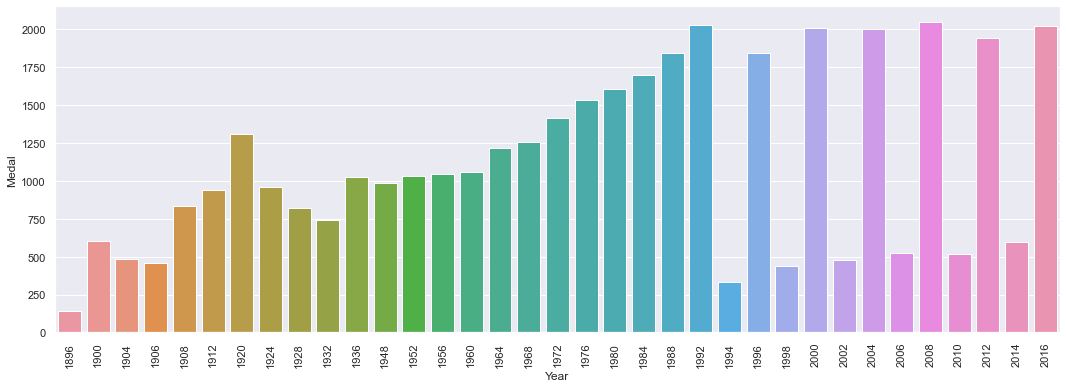

In [238]:
plt.figure(figsize=(18,6))
sns.barplot(x='Year', y='Medal', data=medal_year)
plt.xticks(rotation=90)
plt.show()


In [239]:
data_olympics.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


In [245]:
medal_sports = data_olympics.groupby('Sport')['Medal'].count().reset_index().sort_values(by='Medal',ascending=False).head(20)
medal_sports

,Sport,Medal
5,Athletics,3969
54,Swimming,3048
43,Rowing,2945
27,Gymnastics,2256
22,Fencing,1743
24,Football,1571
30,Ice Hockey,1530
29,Hockey,1528
65,Wrestling,1296
19,Cycling,1263


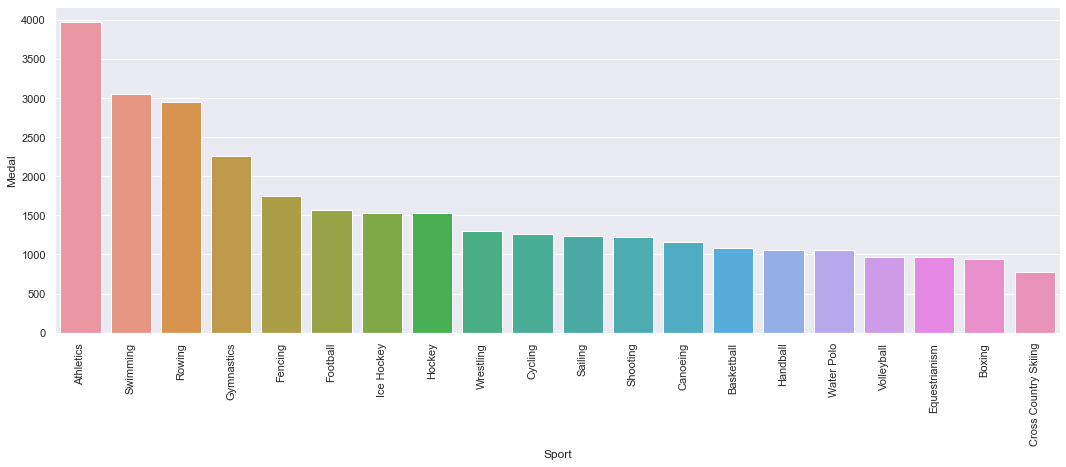

In [246]:
plt.figure(figsize=(18,6))
sns.barplot(x='Sport', y='Medal', data=medal_sports)
plt.xticks(rotation=90)
plt.show()


In [248]:
data_olympics.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


In [265]:
#top 10 atheles who won most medals

medal_athelete = data_olympics.groupby(['region', 'Name', 'Season'])['Medal'].count().reset_index().sort_values(by='Medal', ascending=False).head(10)

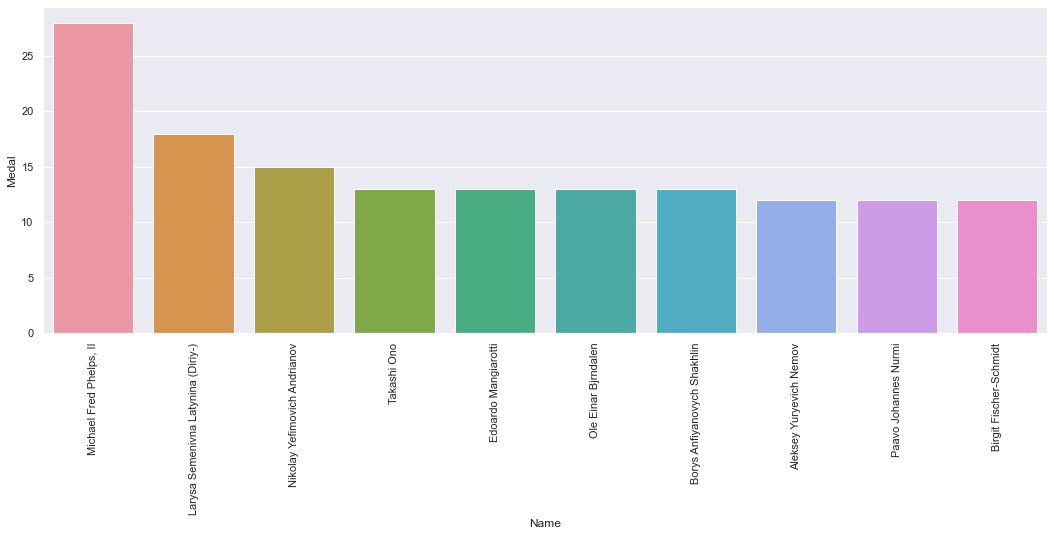

In [264]:
plt.figure(figsize=(18,6))
sns.barplot(x='Name', y='Medal', data=medal_athelete)
plt.xticks(rotation=90)
plt.show()


In [260]:
data_olympics.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


In [301]:
# Medals won by male & Female in all olympics

medal_sex_year=data_olympics.groupby(['Sex', 'Year'])['Medal'].count().reset_index().sort_values(by='Year', ascending = True)

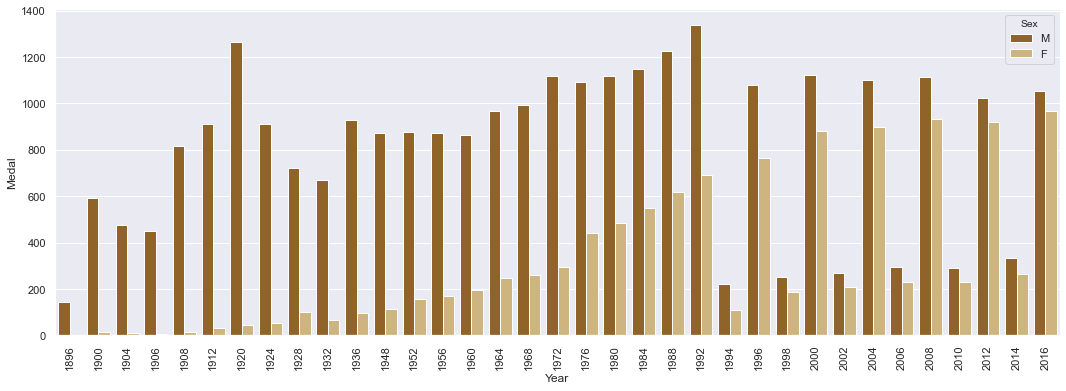

In [303]:
plt.figure(figsize=(18,6))
sns.barplot(x='Year', y='Medal', data=medal_sex_year, hue='Sex')
plt.xticks(rotation=90)
plt.show()


In [305]:
data_olympics.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


- How the number of athletes/countries varied along time ?
- How the proportion of Men/Women varied with time ?
- How about mean age, weight and height along time ?

In [309]:
# Variation of male/female athletes over time (Summer Games)

MenOverTime=data_olympics[(data_olympics['Sex']=='M') & (data_olympics['Season']=='Summer')]
WomenOverTime=data_olympics[(data_olympics['Sex']=='F') & (data_olympics['Season']=='Summer')]


Text(0.5, 1.0, 'Variation of Male Athletes over time')

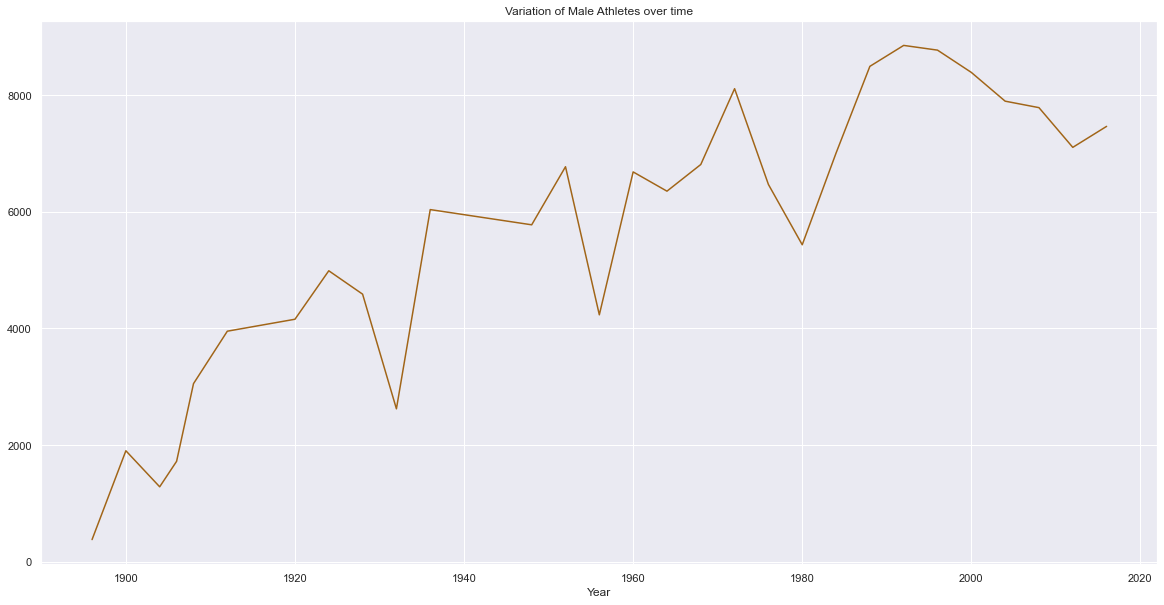

In [313]:
part = MenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'M'].plot()
plt.title('Variation of Male Athletes over time')

Text(0.5, 1.0, 'Variation of Female Athletes over time')

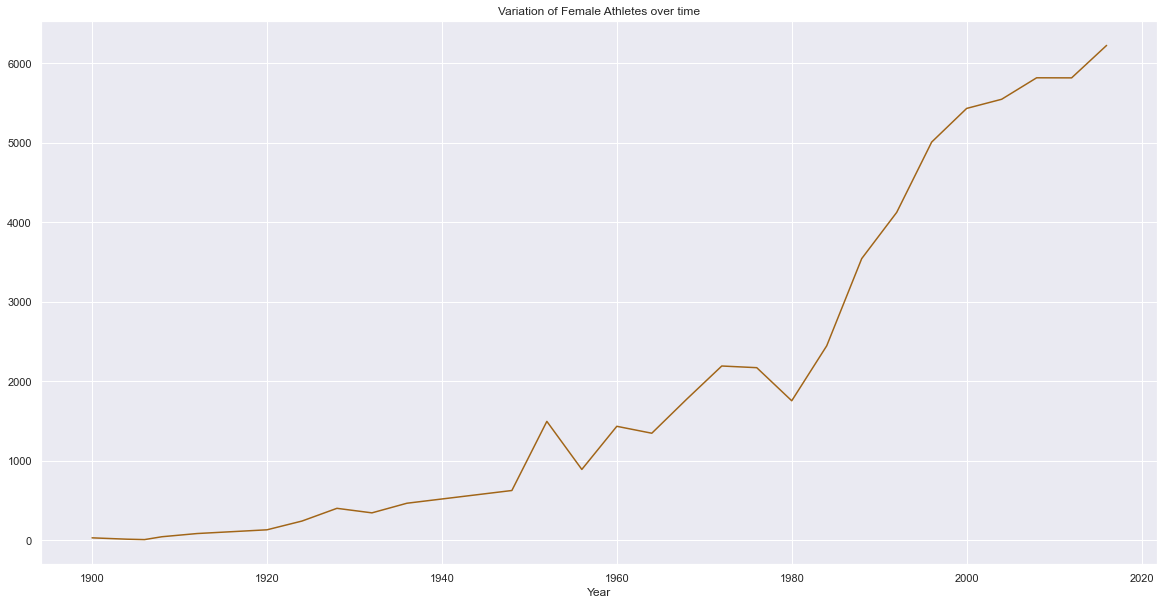

In [315]:
part1 = WomenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part1.loc[:,'F'].plot()
plt.title('Variation of Female Athletes over time')

- After 1900, age of men athelets has fall down significantly.
- Let's explore more and figure out there age

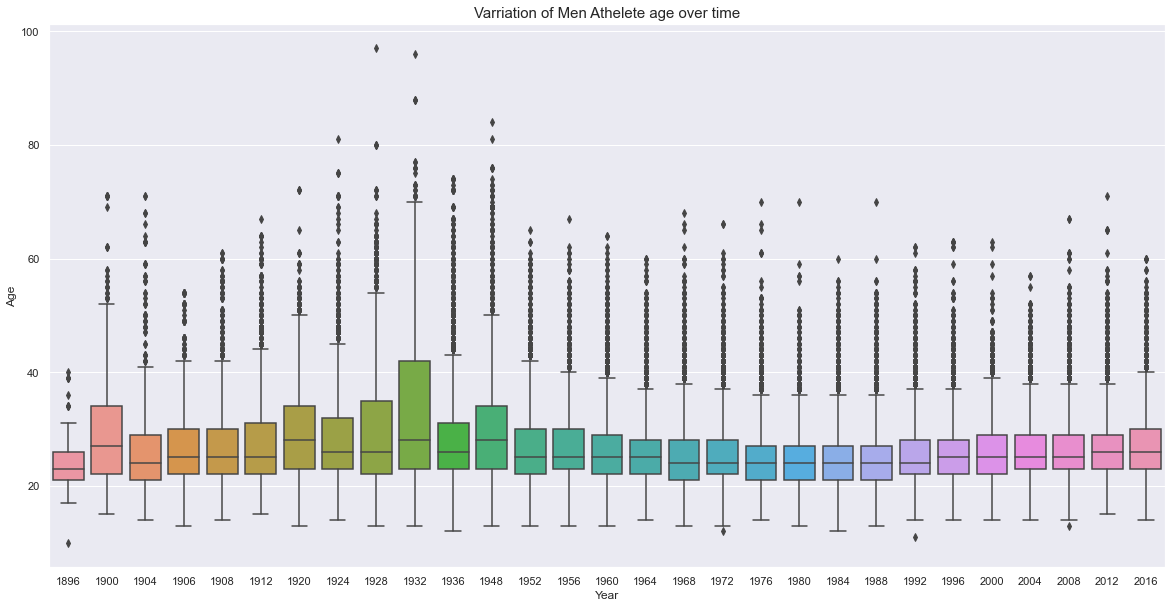

In [317]:
# Age of male atheletes
plt.figure(figsize=(20,10))
sns.boxplot('Year','Age',data=MenOverTime)
plt.title("Varriation of Men Athelete age over time", fontsize=15)
plt.show()

In [320]:
#from 1924 to 1928, athelete age was more than 80. Let explore about them

MenOverTime.loc[MenOverTime.Age>80].head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
9371,5146,George Denholm Armour,M,84.0,175.33897,70.702393,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,UK,NaN
60861,31173,Thomas Cowperthwait Eakins,M,88.0,175.33897,70.702393,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA,NaN
60862,31173,Thomas Cowperthwait Eakins,M,88.0,175.33897,70.702393,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA,NaN
60863,31173,Thomas Cowperthwait Eakins,M,88.0,175.33897,70.702393,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA,NaN
98118,49663,Winslow Homer,M,96.0,175.33897,70.702393,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA,NaN
154855,77710,Robert Tait McKenzie,M,81.0,175.33897,70.702393,Canada,CAN,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN,Canada,NaN
236912,118789,Louis Tauzin,M,81.0,175.33897,70.702393,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,NaN,France,NaN
257054,128719,John Quincy Adams Ward,M,97.0,175.33897,70.702393,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,USA,NaN


All the atheletes above 80 age are participated in 'Art Competitions'

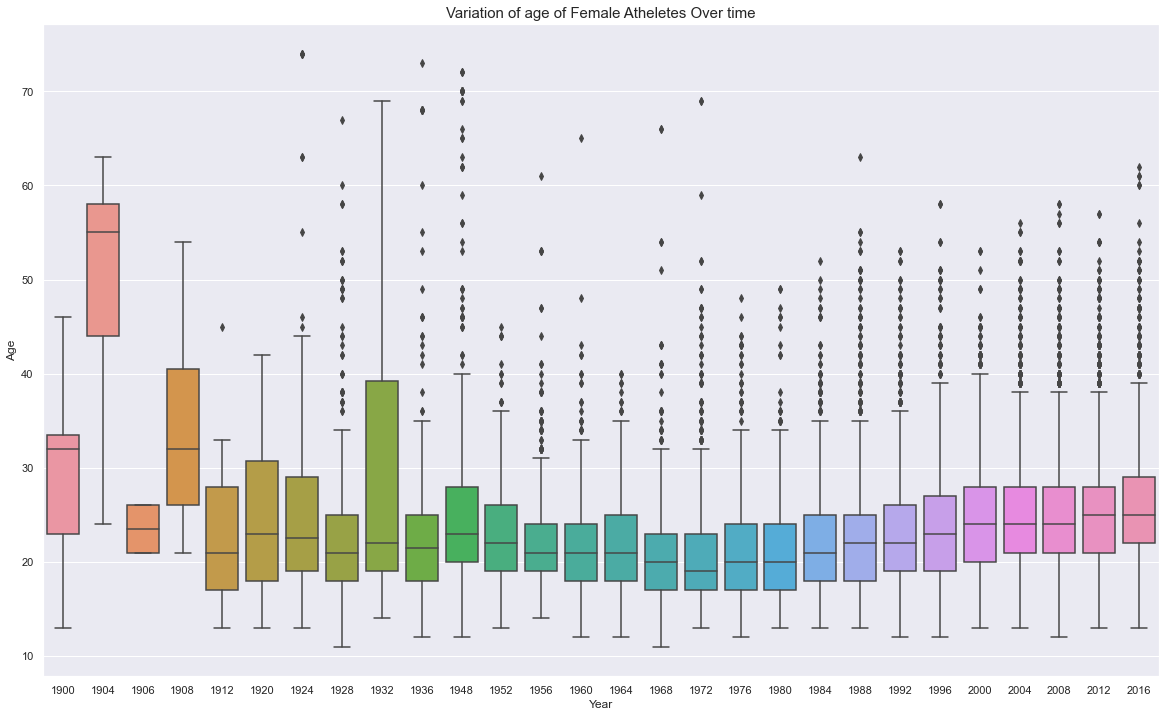

In [321]:
# variation of age of female atheletes

plt.figure(figsize=(20,12))
sns.boxplot('Year', 'Age', data=WomenOverTime)
plt.title("Variation of age of Female Atheletes Over time", fontsize=15)
plt.show()


- Generally, the age distribution starts has a lower minimum and a lower maximum;
- In 1904 the age distribution is strongly different from the other Olympics: let’s know more about this point:

In [328]:
WomenOverTime.loc[WomenOverTime.Year==1904]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
44365,22877,Emma C. Cooke,F,55.0,175.33897,70.702393,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,Silver,USA,NaN
44366,22877,Emma C. Cooke,F,55.0,175.33897,70.702393,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,Silver,USA,NaN
99506,50366,"Matilda ""Lida"" Howell (Scott-)",F,44.0,175.33897,70.702393,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,Gold,USA,NaN
99507,50366,"Matilda ""Lida"" Howell (Scott-)",F,44.0,175.33897,70.702393,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,Gold,USA,NaN
99508,50366,"Matilda ""Lida"" Howell (Scott-)",F,44.0,175.33897,70.702393,Cincinnati Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Team Round,Gold,USA,NaN
190950,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,175.33897,70.702393,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,Bronze,USA,NaN
190951,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,175.33897,70.702393,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,Bronze,USA,NaN
190952,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,175.33897,70.702393,Cincinnati Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Team Round,Gold,USA,NaN
237131,118921,"Leonora Josephine ""Leonie"" Taylor",F,NaN,175.33897,70.702393,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,NaN,USA,NaN
237132,118921,"Leonora Josephine ""Leonie"" Taylor",F,NaN,175.33897,70.702393,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,NaN,USA,NaN


All female atheletes are from USA and paricipated for Archery only

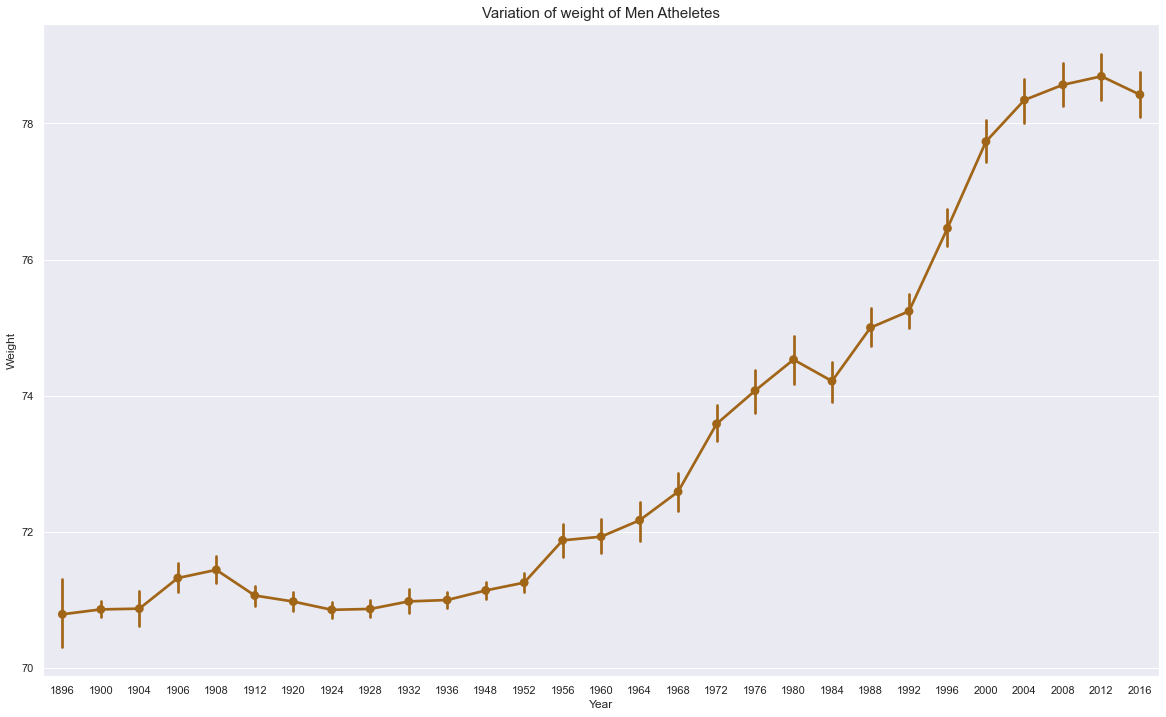

In [335]:
# Varriation of Weights of Men atheletes over time

plt.figure(figsize=(20,12))


sns.pointplot('Year', 'Weight', data=MenOverTime)
plt.title("Variation of weight of Men Atheletes", fontsize=15)

plt.show()



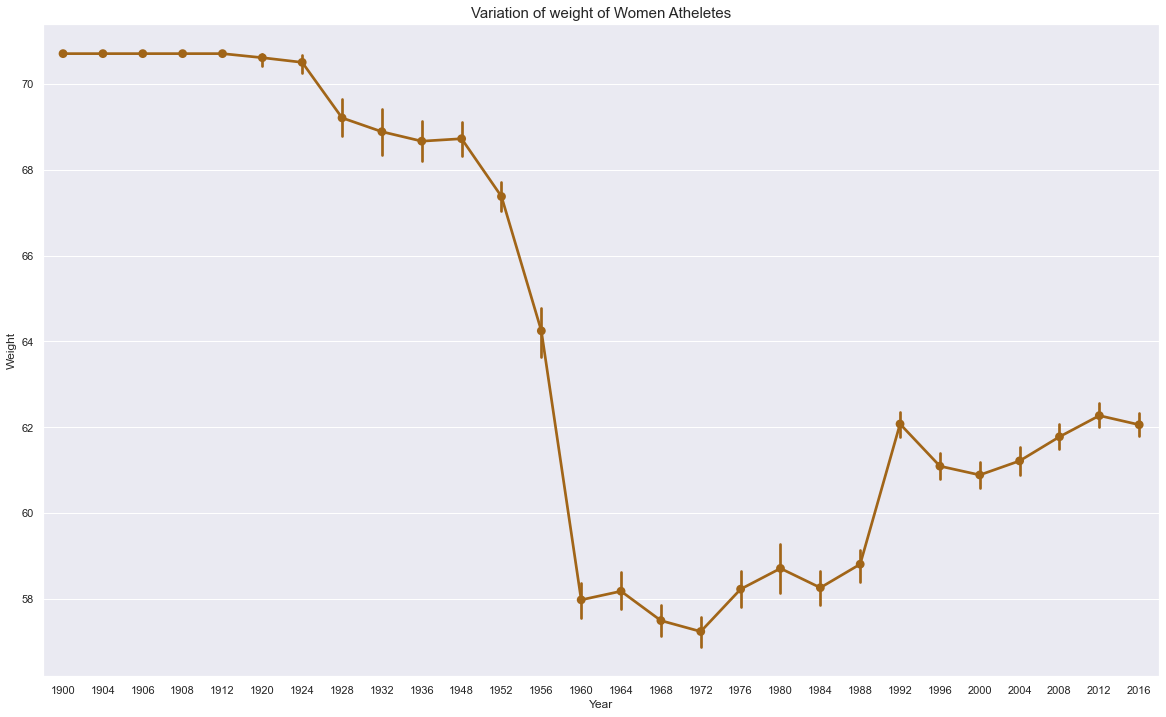

In [337]:
# Varriation of Weights of Women atheletes over time

plt.figure(figsize=(20,12))
sns.pointplot('Year', 'Weight', data=WomenOverTime)
plt.title("Variation of weight of Women Atheletes", fontsize=15)
plt.show()

What we can see is that it seems that we do not have data for women before 1924. Let’s try filtering all the women athletes for that period to review this point:

In [339]:
WomenOverTime.loc[WomenOverTime.Year<1924].head(20)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
283,150,Margaret Ives Abbott (-Dunne),F,23.0,175.33897,70.702393,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold,USA,NaN
284,151,Mary Perkins Ives Abbott (Perkins-),F,42.0,175.33897,70.702393,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,NaN,USA,NaN
1738,968,"Margarete ""Grete"" Adler",F,16.0,175.33897,70.702393,Austria,AUT,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Women's 100 metres Freestyle,NaN,Austria,NaN
1739,968,"Margarete ""Grete"" Adler",F,16.0,175.33897,70.702393,Austria,AUT,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Bronze,Austria,NaN
1756,975,Anna Mrtha Vilhelmina Adlerstrhle (von Oelreich-),F,39.0,175.33897,70.702393,Sweden,SWE,1908 Summer,1908,Summer,London,Tennis,"Tennis Women's Singles, Covered Courts",Bronze,Sweden,NaN
1768,978,Mrta Elvira Adlerz (-Hermansson),F,15.0,175.33897,70.702393,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Diving,Diving Women's Plain High,NaN,Sweden,NaN
1769,978,Mrta Elvira Adlerz (-Hermansson),F,23.0,175.33897,70.702393,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Diving,Diving Women's Plain High,NaN,Sweden,NaN
2749,1531,Frances Helen Aitchison (-Leisk),F,30.0,175.33897,70.702393,Great Britain-1,GBR,1912 Summer,1912,Summer,Stockholm,Tennis,"Tennis Mixed Doubles, Covered Courts",Silver,UK,NaN
2750,1531,Frances Helen Aitchison (-Leisk),F,30.0,175.33897,70.702393,Great Britain,GBR,1912 Summer,1912,Summer,Stockholm,Tennis,"Tennis Women's Singles, Covered Courts",NaN,UK,NaN
4963,2830,Mary Aileen Allen (Conquest-),F,31.0,157.00000,70.702393,United States,USA,1920 Summer,1920,Summer,Antwerpen,Diving,Diving Women's Springboard,NaN,USA,NaN


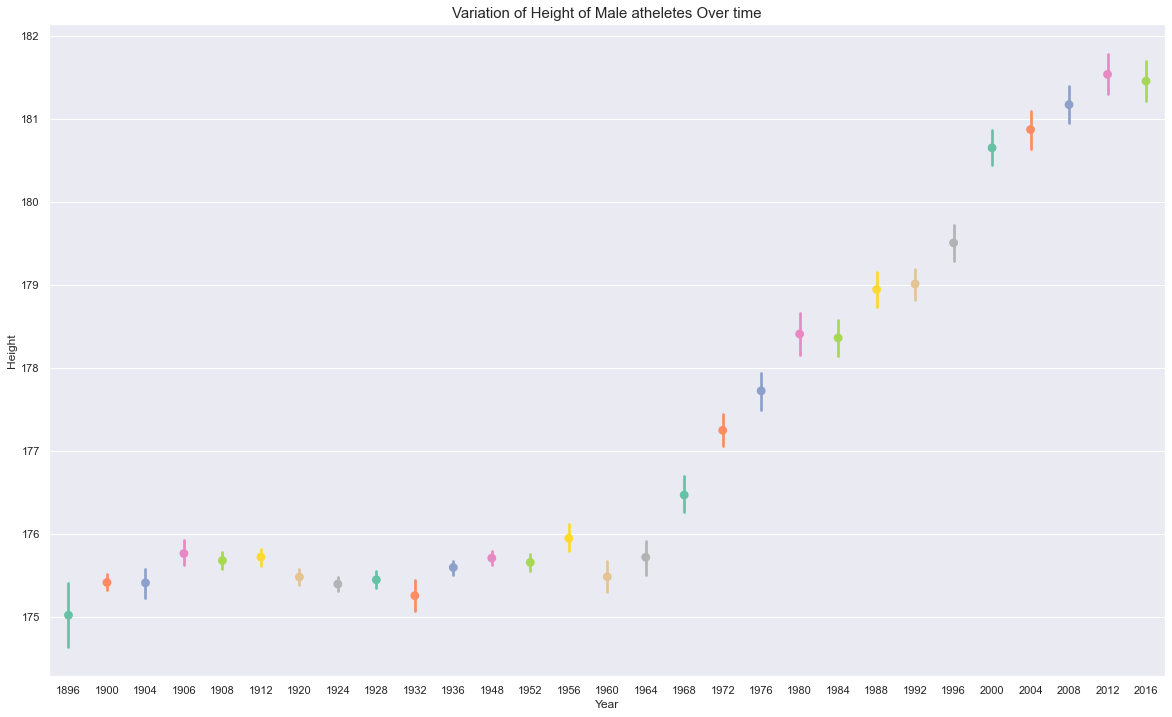

In [342]:
# Varriation of Heights of Men atheletes over time

plt.figure(figsize=(20,12))
sns.pointplot('Year','Height',data=MenOverTime, palette='Set2')
plt.title("Variation of Height of Male atheletes Over time", fontsize=15)
plt.show()

Heights are increasing over the time

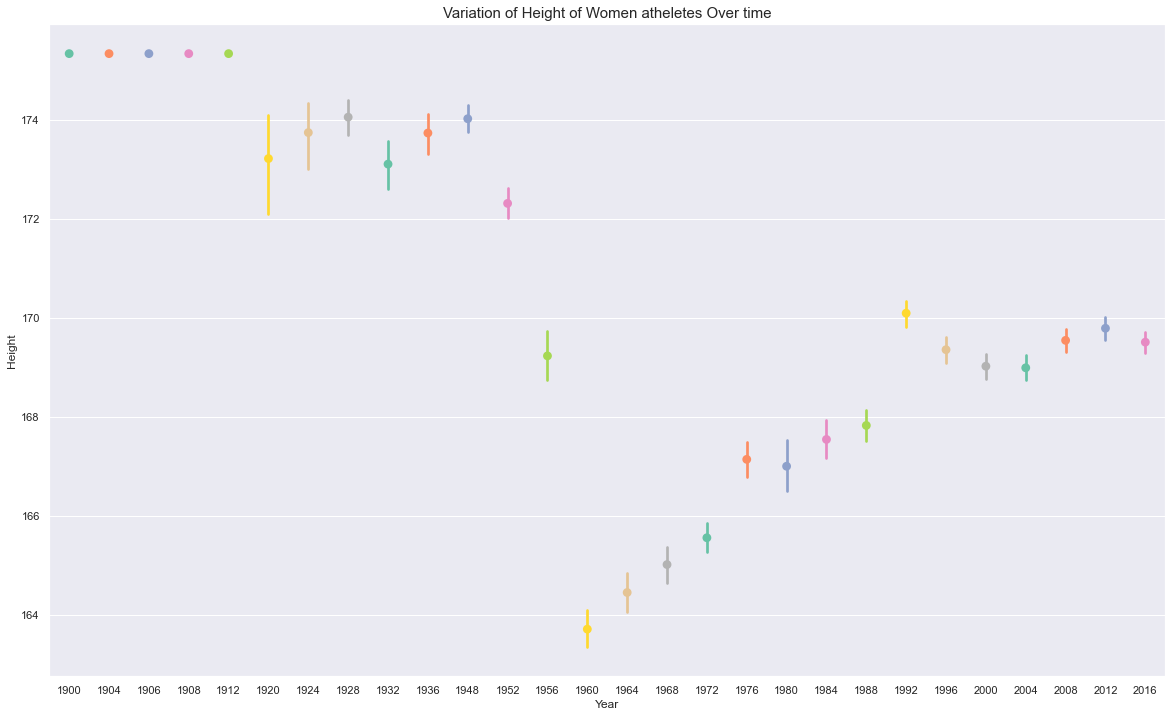

In [343]:
# Varriation of Heights of Women atheletes over time

plt.figure(figsize=(20,12))
sns.pointplot('Year','Height',data=WomenOverTime, palette='Set2')
plt.title("Variation of Height of Women atheletes Over time", fontsize=15)
plt.show()

In [346]:
WomenOverTime.loc[(WomenOverTime['Year'] > 1924) & (WomenOverTime['Year'] < 1952)].head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.00000,70.702393,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.00000,70.702393,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
731,419,Majken berg,F,30.0,170.00000,60.000000,Sweden,SWE,1948 Summer,1948,Summer,London,Athletics,Athletics Women's Discus Throw,NaN,Sweden,NaN
1301,733,Ilona cs (-Zimmermann),F,16.0,175.33897,70.702393,Hungary,HUN,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Women's 100 metres Freestyle,NaN,Hungary,NaN
1302,733,Ilona cs (-Zimmermann),F,16.0,175.33897,70.702393,Hungary,HUN,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,NaN,Hungary,NaN
1484,825,Lynda Riley Adams (-Hunt),F,16.0,175.33897,70.702393,Canada,CAN,1936 Summer,1936,Summer,Berlin,Diving,Diving Women's Springboard,NaN,Canada,NaN
1485,825,Lynda Riley Adams (-Hunt),F,16.0,175.33897,70.702393,Canada,CAN,1936 Summer,1936,Summer,Berlin,Diving,Diving Women's Platform,NaN,Canada,NaN
1525,845,"Birgitta Ann-Agnes ""Bride"" Adams-Ray",F,21.0,175.33897,70.702393,Sweden,SWE,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Women's High Jump,NaN,Sweden,NaN
1567,874,"Edith Addams de Habbelinck (-Lutjens, -Taylor,...",F,20.0,175.33897,70.702393,Belgium,BEL,1928 Summer,1928,Summer,Amsterdam,Fencing,"Fencing Women's Foil, Individual",NaN,Belgium,NaN
1568,875,Jenny Marie Beatrice Addams,F,19.0,175.33897,70.702393,Belgium,BEL,1928 Summer,1928,Summer,Amsterdam,Fencing,"Fencing Women's Foil, Individual",NaN,Belgium,NaN


# Let's explore about Italian Atheletes

In [355]:
itMenOverTime = MenOverTime.loc[MenOverTime.region == 'Italy']


26.68258149489628

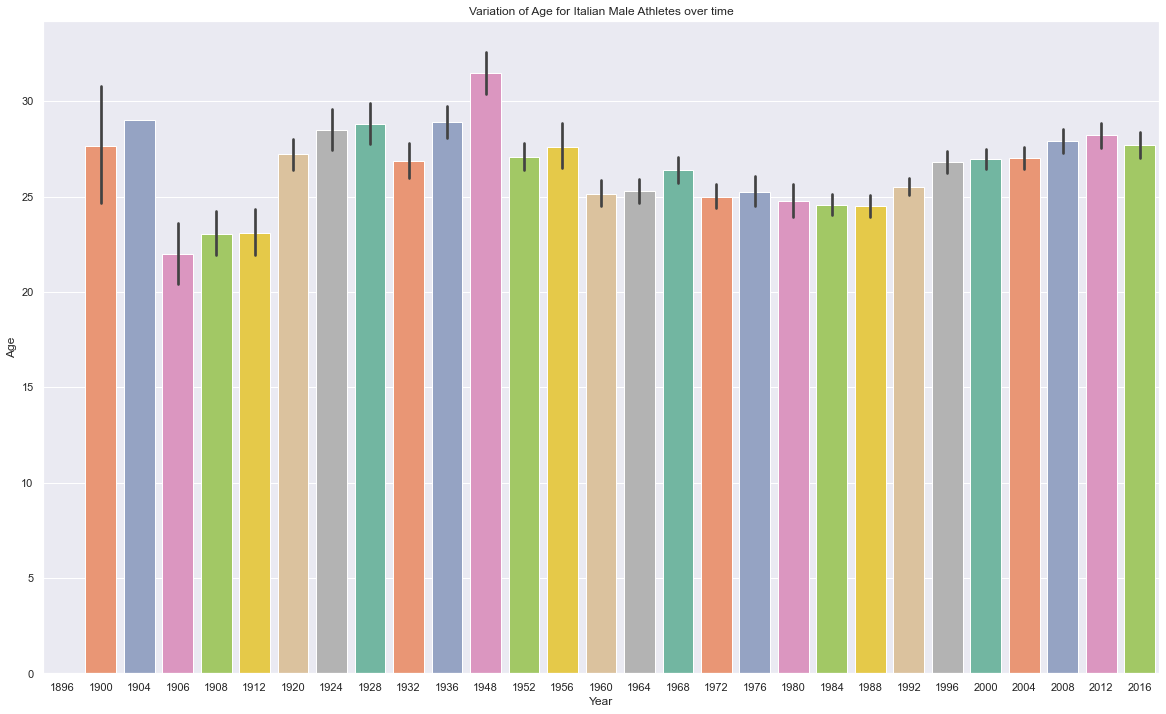

In [351]:
plt.figure(figsize=(20,12))
sns.barplot(x='Year',y='Age', data=itMenOverTime, palette='Set2')
plt.title('Variation of Age for Italian Male Athletes over time')
plt.show()

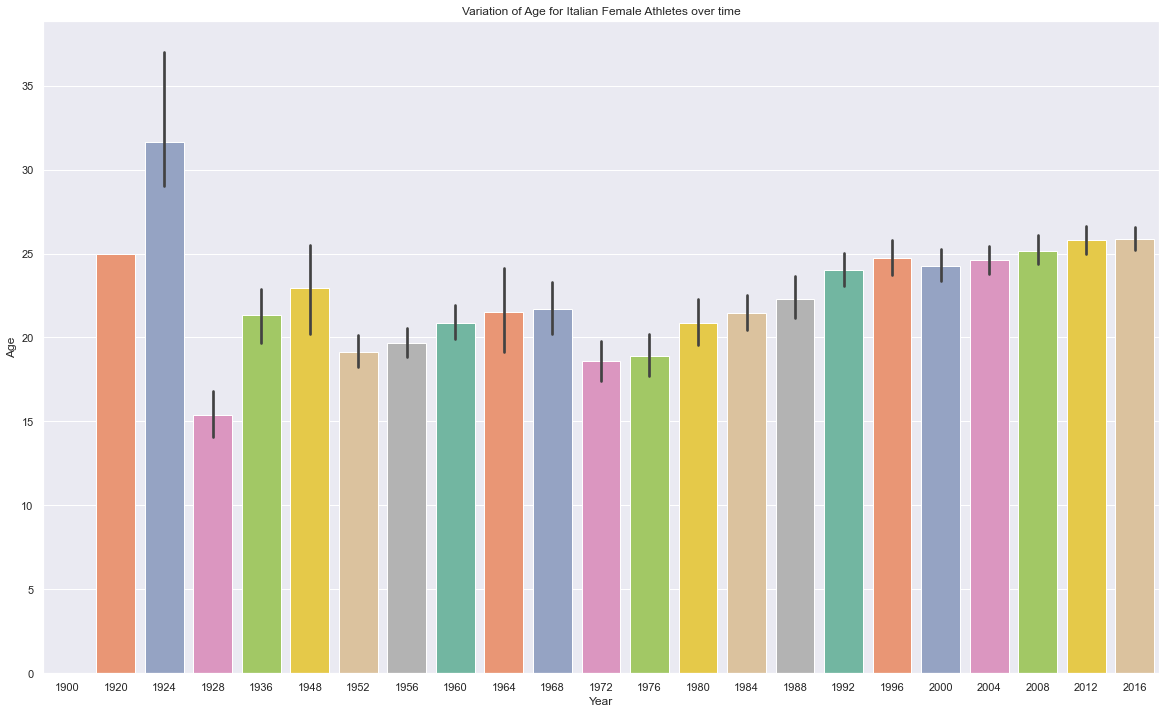

In [358]:
itWomenOverTime = WomenOverTime.loc[WomenOverTime.region == 'Italy']
plt.figure(figsize=(20,12))
sns.barplot(x='Year',y='Age', data=itWomenOverTime, palette='Set2')
plt.title('Variation of Age for Italian Female Athletes over time')
plt.show()

Average age of italian atheletes is 25.

In [359]:
gymMenOverTime = MenOverTime.loc[MenOverTime['Sport'] == 'Gymnastics']
gymWomenOverTime = WomenOverTime.loc[WomenOverTime['Sport'] == 'Gymnastics']

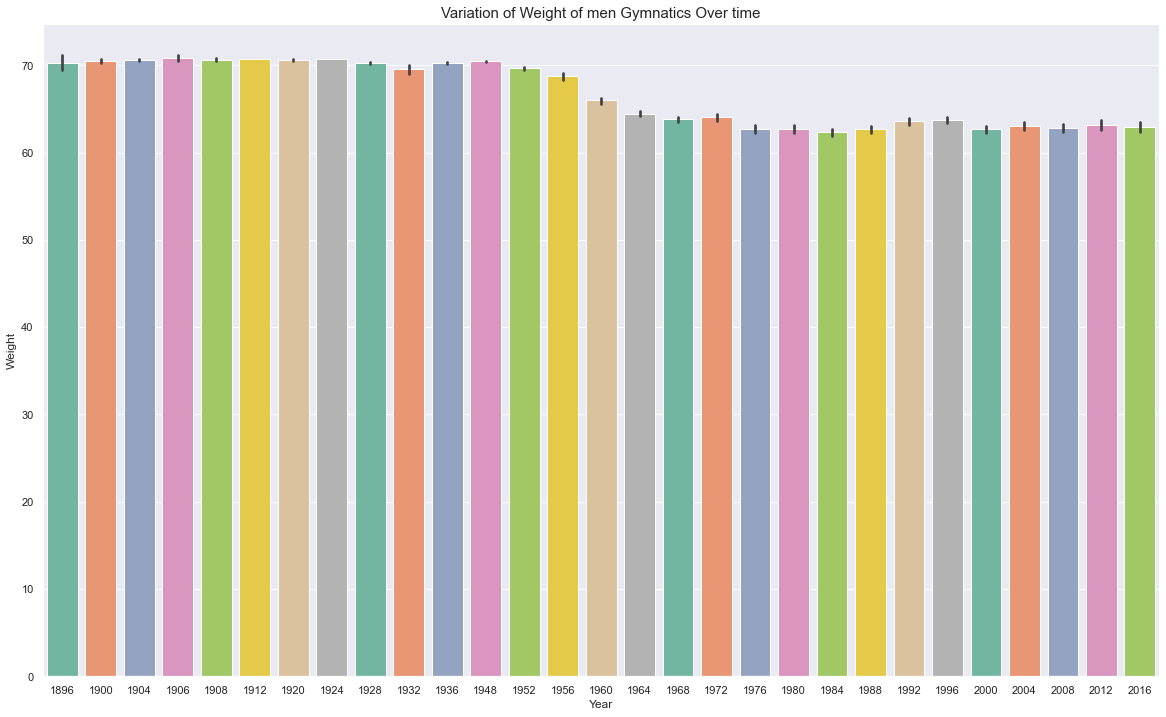

In [362]:
# Varriation of Weights of men atheletes for Gymnastics

plt.figure(figsize=(20,12))
sns.barplot('Year','Weight',data=gymMenOverTime, palette='Set2')
plt.title("Variation of Weight of men Gymnatics Over time", fontsize=15)
plt.show()

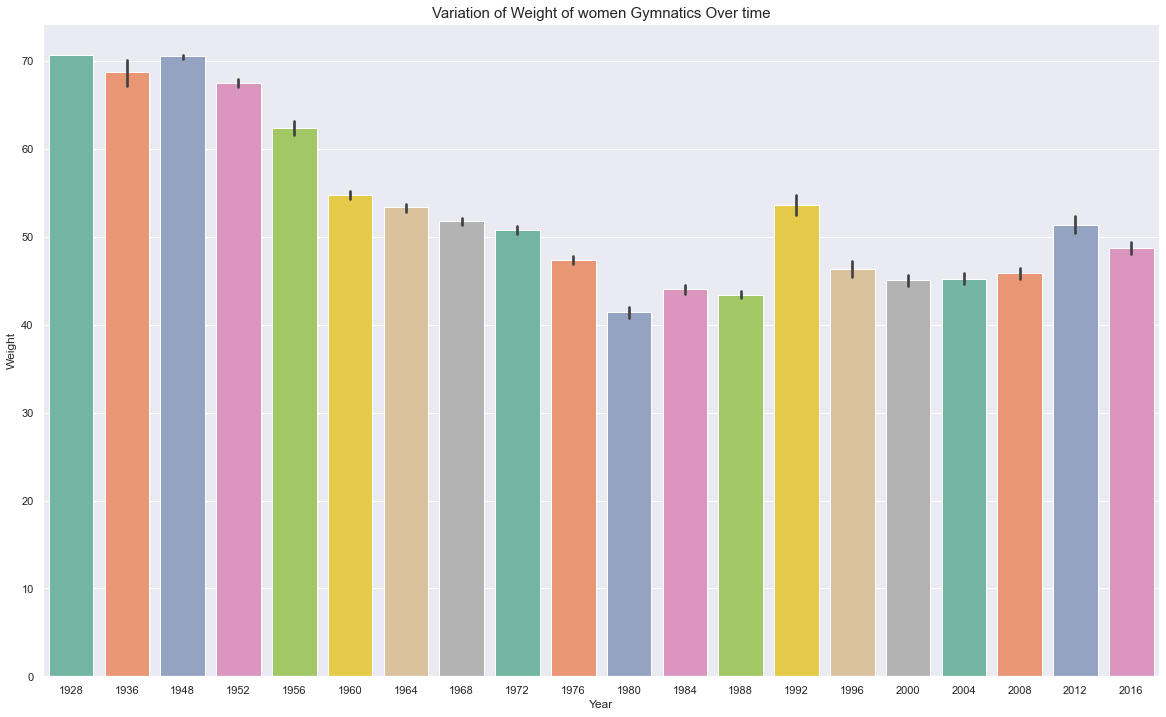

In [363]:
# Varriation of Weights of women atheletes for Gymnastics

plt.figure(figsize=(20,12))
sns.barplot('Year','Weight',data=gymWomenOverTime, palette='Set2')
plt.title("Variation of Weight of women Gymnatics Over time", fontsize=15)
plt.show()

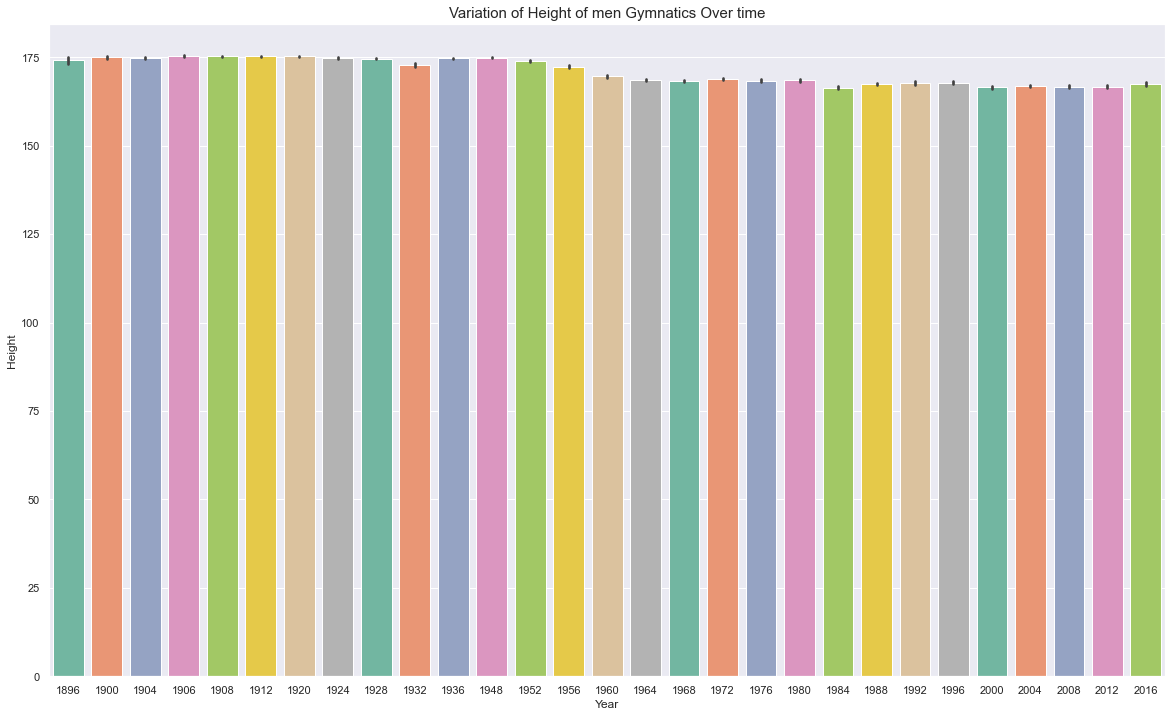

In [364]:
# Varriation of Heights of men atheletes for Gymnastics

plt.figure(figsize=(20,12))
sns.barplot('Year','Height',data=gymMenOverTime, palette='Set2')
plt.title("Variation of Height of men Gymnatics Over time", fontsize=15)
plt.show()

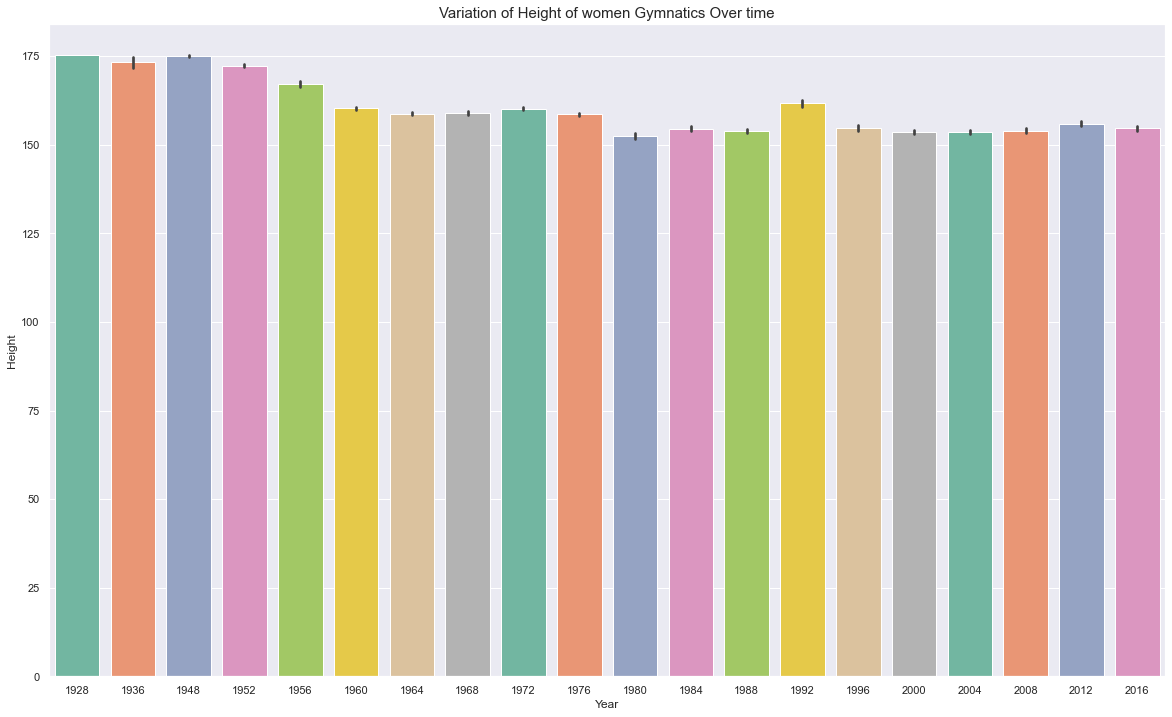

In [365]:
# Varriation of Heights of women atheletes for Gymnastics

plt.figure(figsize=(20,12))
sns.barplot('Year','Height',data=gymWomenOverTime, palette='Set2')
plt.title("Variation of Height of women Gymnatics Over time", fontsize=15)
plt.show()